Для освоения темы создания и обучения нейроных сетей создадим простые варианты нейронок используя фреймворк TensorFlow и Keras. Сравним созданные модели.

In [63]:
# Импортируем нужные модули изучаемых фреймворков.

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score


Для исследования импортируем Fashion MNIST датасет.
Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Каждому классу обозначенному цифрой мы можем присвоить текстовое значение

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

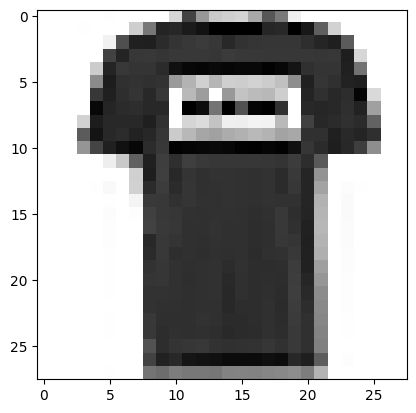

In [6]:
plt.figure()
plt.imshow(train_images[1], cmap='binary')
plt.show()

In [7]:
# нормализуем данные в диапазоне от 0 до 1

train_images = train_images / 255.0

test_images = test_images / 255.0

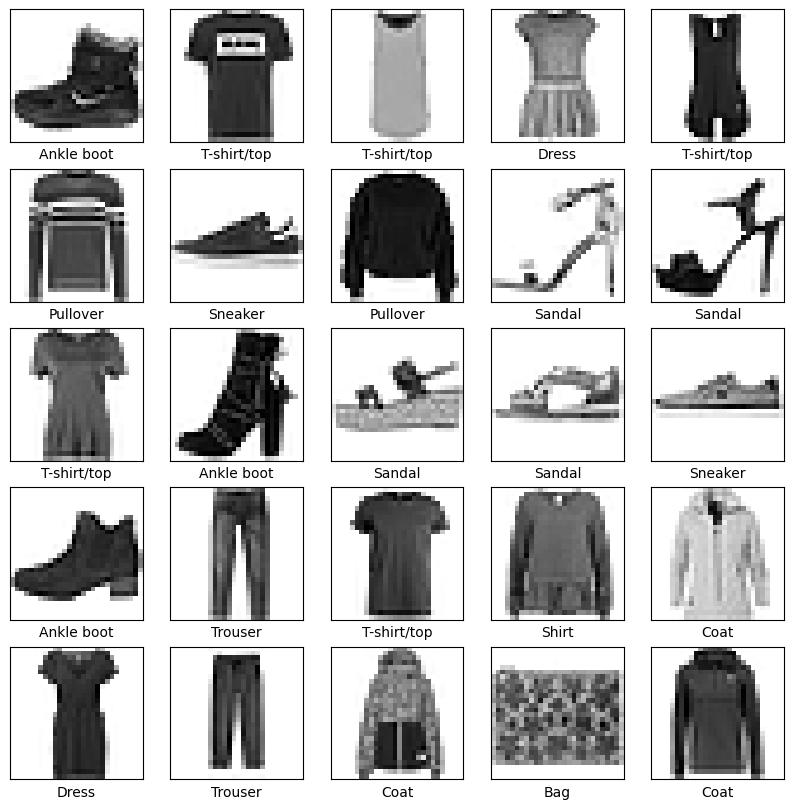

In [8]:
# Посмотрим примеры тестовых изображений

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# Создадим базовую нейросеть из примера с tensorflow.org

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [10]:
predictions = model(train_images[:1]).numpy()
predictions

array([[0.06013359, 0.08304089, 0.0371731 , 0.12450952, 0.13901503,
        0.20536704, 0.03454006, 0.05938092, 0.11347169, 0.14336814]],
      dtype=float32)

In [11]:
tf.nn.softmax(predictions).numpy()

array([[0.09596089, 0.09818447, 0.09378269, 0.10234164, 0.10383698,
        0.11096048, 0.09353608, 0.09588868, 0.10121822, 0.10428997]],
      dtype=float32)

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
loss_fn(train_labels[:1], predictions).numpy()

2.26058

In [14]:
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5321 - accuracy: 0.8134
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4028 - accuracy: 0.8550
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3667 - accuracy: 0.8671
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3455 - accuracy: 0.8730
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3320 - accuracy: 0.8774


In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3658 - accuracy: 0.8688 - 707ms/epoch - 2ms/step

Test accuracy: 0.8687999844551086


Проверим работу обученной нейросети и с помощью Matplotlib графически от образим полученные результаты.

In [17]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])


In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [19]:
predictions[0]

array([0.08775806, 0.08775748, 0.08775759, 0.0877575 , 0.08775761,
       0.08801466, 0.08775797, 0.11305065, 0.0877602 , 0.18462825],
      dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

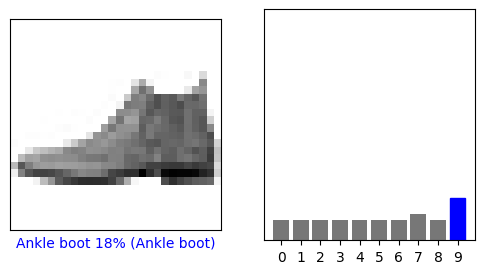

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

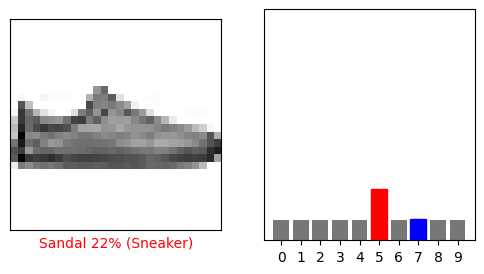

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Мы видим что у обученной нейросети есть проблемы с категорией Sneaker, которая определилась как Sandal. Пока что сложно понять в чем причина , но так как проблемы возникают только с одной категорией - можно предположить что обучающие данные именно этой категории были плохо подобраны или размечены.
Далее мы попробуем решить эту проблему изменяя архитектуру нейросетей.

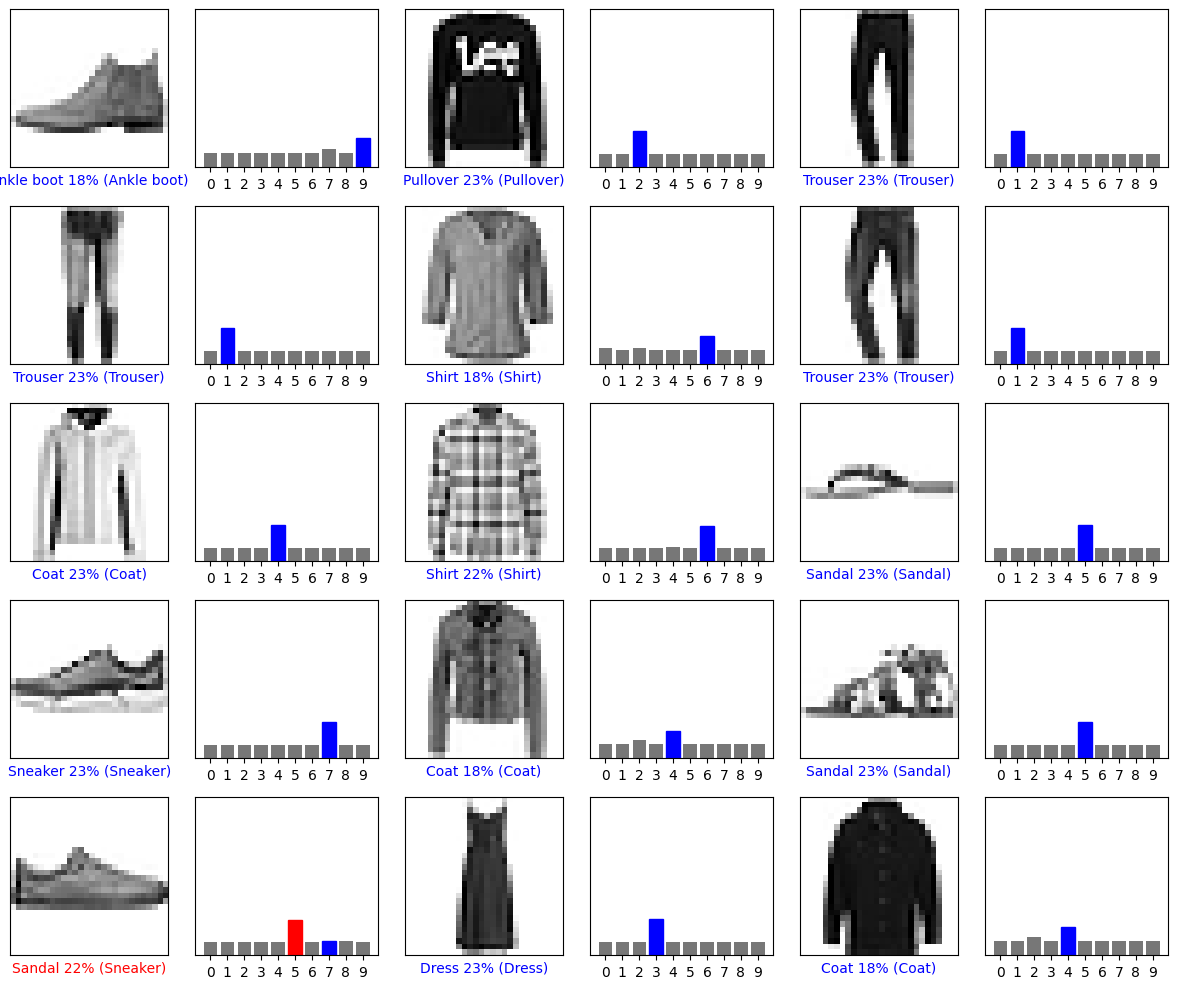

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Даже на базовой модели мы получили неплохую предсказательную силу равную 0.88.
Так как актуальная версия 2+ TensorFlow не поддерживает методы .placeholder,то другие вариации нефронной сети будем строить используя инструментарий Keras.
Построим нейросеть с арзитектурой разобранной на семинаре.

In [49]:
model_k1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, activation = 'softmax', name='output')
])

In [50]:
config = model_k1.get_config()
model_k1.save_weights('fashion_weights.h5')
model_k1 = model_k1.from_config(config)
model_k1.load_weights('fashion_weights.h5')

In [51]:
model_k1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [53]:
model_k1.fit(train_images, train_labels, batch_size = 250, epochs=15, verbose=0)

In [54]:
test_loss, test_acc = model_k1.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3337 - accuracy: 0.8862 - 831ms/epoch - 3ms/step

Test accuracy: 0.8862000107765198


Несмотря на более сложную архитектуру нейросети model_k1 с четырмя скрытыми слоями - полученные результат не намного превосходит базовую версию. Accuracy вырос с 0.868 до 0.886
Продолжим исследования и создадим нейросеть со сверточными слоями.

In [55]:
# Импортируем нужные модули

import keras
from keras.layers import *
import keras.utils
from tensorflow.keras.preprocessing import image

In [57]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# x_train = x_train / 255
# x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(train_labels, 10)
y_test_cat = keras.utils.to_categorical(test_labels, 10)


# fashion_mnist = keras.datasets.fashion_mnist

# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [58]:
input_shape = (28,28,1)

In [59]:
model_cnn = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [60]:
model_cnn.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [61]:
%%time

history = model_cnn.fit(train_images, y_train_cat, batch_size=32, epochs=5,validation_data =(test_images, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.4257 - accuracy: 0.8467 - val_loss: 0.3258 - val_accuracy: 0.8806
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2802 - accuracy: 0.8976 - val_loss: 0.2808 - val_accuracy: 0.8954
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2378 - accuracy: 0.9121 - val_loss: 0.2668 - val_accuracy: 0.9031
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2071 - accuracy: 0.9241 - val_loss: 0.2514 - val_accuracy: 0.9102
Epoch 5/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1827 - accuracy: 0.9327 - val_loss: 0.2453 - val_accuracy: 0.9126
CPU times: user 8min 55s, sys: 10.2 s, total: 9min 5s
Wall time: 5min 59s


Данная архитектура нейронной сети показала самую высокую accuracy = 0.912. Однако и вычислительных мощностей потребовалось намного больше Wall time: 5min 59s.


In [65]:
# Получим предсказания
probability_model = tf.keras.Sequential([model_cnn,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 10ms/step


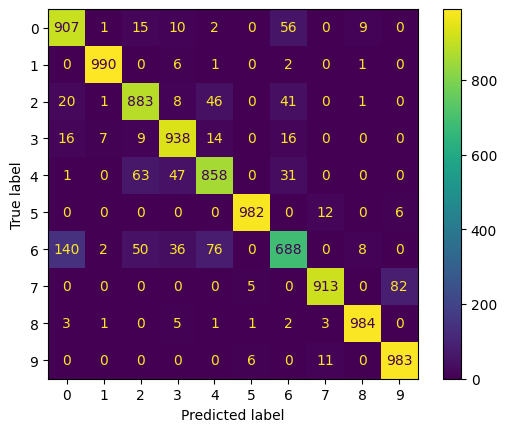

In [66]:
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [67]:
def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred, labels=labels, average=None)
  recall = recall_score(y_true, y_pred, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

In [68]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.834, полнота - 0.907
Класс - 1, точность - 0.988, полнота - 0.990
Класс - 2, точность - 0.866, полнота - 0.883
Класс - 3, точность - 0.893, полнота - 0.938
Класс - 4, точность - 0.860, полнота - 0.858
Класс - 5, точность - 0.988, полнота - 0.982
Класс - 6, точность - 0.823, полнота - 0.688
Класс - 7, точность - 0.972, полнота - 0.913
Класс - 8, точность - 0.981, полнота - 0.984
Класс - 9, точность - 0.918, полнота - 0.983


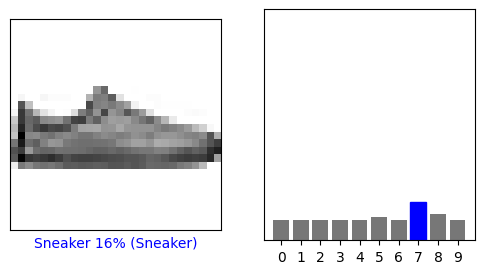

In [69]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Модель арзитектуры нейроно сети с использованием сверточных слоев куда эффективней базовой модели определяет седьмую категорию. Предположение о плохом датасете для этой выборки можно снять.

Мы достигли уже неплохого предсказательного результата и вопрос дальнейшего улучшения результатов через усложнение архитектуры нейросети становится более актуальным.
Попробуем применить метод каскада нейросетей.
Используем комбинацию 2х сетей, сети образца и сети с параметрами, которая "заточена" максимально хорошо предсказывать самый плохо определяемый класс.

In [70]:
# Создаем словарь который будет содержать модель сети и параметры для обучения
models = dict()
models[0] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
]), tf.keras.optimizers.Adam(learning_rate=0.001), 250]
models[1] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='gelu', name='hiden_two'),
    keras.layers.Dense(64, activation='sigmoid', name='hiden_three'),
    keras.layers.Dense(64, activation='selu', name='hiden_four'),
    keras.layers.Dense(10, name='output')]), tf.keras.optimizers.AdamW(learning_rate=0.001), 450]
# Список для сохранения результатов
result = list()

In [71]:
# Формируем сеть.
for key, param in models.items():
  # Загружаем параметры
  model, opt, batch = param[0], param[1], param[2]
  # Загружаем входные веса, чтобы хоть как-то "уравнять" результаты работы
  model.load_weights('fashion_weights.h5')
  model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [72]:
model.fit(train_images, train_labels, batch_size=batch, epochs=25, verbose=0)

In [74]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3355 - accuracy: 0.8919 - 1s/epoch - 5ms/step

Test accuracy: 0.8919000029563904


313/313 [==============================] - 2s 6ms/step
0.8919
Класс - 0, точность - 0.834, полнота - 0.851
Класс - 1, точность - 0.983, полнота - 0.984
Класс - 2, точность - 0.825, полнота - 0.799
Класс - 3, точность - 0.905, полнота - 0.889
Класс - 4, точность - 0.798, полнота - 0.848
Класс - 5, точность - 0.983, полнота - 0.943
Класс - 6, точность - 0.729, полнота - 0.710
Класс - 7, точность - 0.933, полнота - 0.973
Класс - 8, точность - 0.976, полнота - 0.967
Класс - 9, точность - 0.957, полнота - 0.955
None


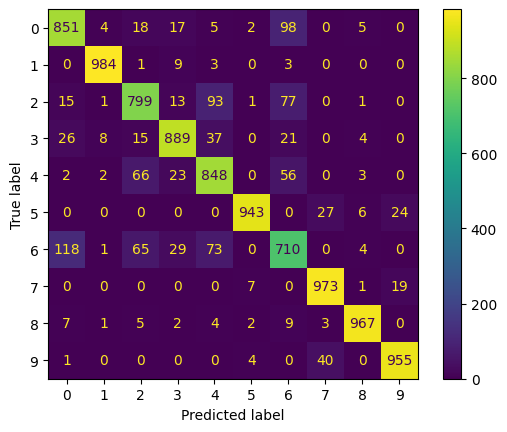

In [75]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
# Сохраняем массив с вероятностями
result.append(probability_model.predict(test_images))
# Получаем финишное предсказание суммируя два массива с вероятностями
y_pred = np.argmax(sum(result), axis=1)
# Окончательная метрика качества
print(accuracy_score(test_labels, y_pred))
# Распределение предсказаний по классам
print(recall_precision(test_labels, y_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

Данный вариант каскадной ИНС требует меньше вычислительных можностей, но итоговая эффективность ниже чем у модели CNN.
Для дальнейшего улучшения результатов можно попытаться подобрать параметры нейросети используя модуль GridSearchCV. Однако это потребует больших затрат вычистительных мощностей и времени. Так как текущая задача носит учебные цели - этот инструмент будет избыточным.
Финальным экспериментом будет попытка подобрать параметры для самой эфективной на данный момент арзитектуры нейросети.

In [79]:
model_cnn2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (4,4), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(),
      Dense(128,activation = 'relu'),
      Dense(64,activation = 'relu'),
      Dense(32,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [80]:
model_cnn2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [81]:
%%time

history = model_cnn2.fit(train_images, y_train_cat, batch_size=64, epochs=5,validation_data =(test_images, y_test_cat) )

Epoch 1/5
938/938 [==============================] - 72s 76ms/step - loss: 0.4705 - accuracy: 0.8297 - val_loss: 0.3322 - val_accuracy: 0.8819
Epoch 2/5
938/938 [==============================] - 70s 75ms/step - loss: 0.2959 - accuracy: 0.8921 - val_loss: 0.3077 - val_accuracy: 0.8845
Epoch 3/5
938/938 [==============================] - 73s 78ms/step - loss: 0.2551 - accuracy: 0.9056 - val_loss: 0.2753 - val_accuracy: 0.9012
Epoch 4/5
938/938 [==============================] - 71s 76ms/step - loss: 0.2225 - accuracy: 0.9175 - val_loss: 0.2428 - val_accuracy: 0.9113
Epoch 5/5
938/938 [==============================] - 72s 76ms/step - loss: 0.1978 - accuracy: 0.9264 - val_loss: 0.2602 - val_accuracy: 0.9077
CPU times: user 9min 19s, sys: 7.36 s, total: 9min 27s
Wall time: 5min 59s


### Вывод.

Как видно из последнего эксперимента усложнение архитеуткры нейросети при увеличение batch_size до 64 привело лишь к снижению эффективности.
Весь лимит мощностей GPU предоставляемых гугл колаб закончился и дальнейшие эксперименты пока что недоступны.
Лучший результат достигнут с использование CNN. Однако даже базовая нейросеть показала немплохой результат предсказаний равный 0.868

Если будут доступны дополнительные вычислительные мощности, то можно будет продолжить поиск более  оптимальных вариантов арзитектуры нейроной сети.